# Decision Trees

Decision trees are supervised machine learning algorithms. Supervised learning involves building models that learn from a labeled dataset, where the model is trained on pairs of inputs and their corresponding outputs. The algorithm learns a functional mapping between these inputs and outputs. For instance, if we consider a dataset as a group of neighbors, when a new data point (resident) is introduced into the neighborhood, a decision tree can be used to infer its characteristics based on the features of its settling 'location'.

There are two main types of tasks that decision trees can be used for:

**Classification:** This is a qualitative and categorical approach where the model is trained to identify known categories within the data. When a new data point is introduced, the decision tree assigns it to one of the predefined categories.

**Regression:** This is a quantitative approach where the model performs curve fitting based on continuous numerical variables. In regression, the decision tree predicts a continuous value for the new data point.

The image below summarizes the concept of decision trees in a very pragmatic manner which makes the higher level concept easier to undertsand:

![](<Screenshot 2023-11-30 at 8.28.38 PM.png>)

image source: https://www.datacamp.com/tutorial/decision-tree-classification-python

# Decision Trees for Classification

In this section of the project, I focus on classifying text data extracted from Wikipedia to analyze the context in which different types of automobiles are mentioned. During the EDA phase, web scraping was performed to collect this data. It was then stored in a DataFrame, with two main fields: 'label' and 'sentiment'. The 'label' field categorizes the text into three types of vehicles: 'electric vehicles', 'gasoline vehicles', and 'hybrid vehicles'. The 'sentiment' field, ranging from -1 to 1, quantifies the sentiment expressed in the text. Given the dataset containing all the scraped text from the Wikipedia source, we can train a model that can classify a piece of text to determine if it's about electric, gas or hybrid model vehicles.

# Data Source: Text Data Collected from Wikipedia

In [98]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../eda/ev-wiki-crawl-results.csv')  
print(df.shape)

(1225, 3)


In [99]:
df.head()

text             label  \
0  electric motive power started 1827 hungarian p...  electric vehicle   
1  first mass produced appeared america early 190...  electric vehicle   
2  20th century uk world largest user electric ro...  electric vehicle   
3  1900 28 percent car road electric ev popular e...  electric vehicle   
4  seldom marketed woman luxury car may stigma am...  electric vehicle   

   sentiment  
0    -0.7506  
1     0.9201  
2     0.7096  
3     0.9169  
4     0.9231

# Methods

I plan to implement various decision tree algorithms on the collected text data:

- Baseline Random Classifier: As a starting point, I'll use a baseline random classifier. This method involves no learning algorithm and randomly classifies the data, serving as a benchmark for comparison.

- Decision Tree Classification (using sklearn's DecisionTreeClassifier): This step involves using a Decision Tree Classifier to categorize the texts into different vehicle types.

- Random Forest Classification: Here, I will employ sklearn's RandomForestClassifier. This will help us compare its performance against the simple decision tree to observe any improvements.

- Decision Tree Regression: Lastly, Decision Tree Regression will be applied, not for classification, but to analyze the sentiment scores associated with the text data, quantifying how positive or negative the sentiments are.

### Import

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score

### Read and re-format

In [101]:
#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])

index = 0 : label = electric vehicle
index = 1 : label = gasoline vehicle
index = 2 : label = hybrid vehicle
number of text chunks =  1225
['electric motive power started 1827 hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car 1835 professor sibrandus stratingh university groningen netherlands built small scale electric car sometime 1832 1839 robert anderson scotland invented first crude electric carriage powered non rechargeable primary cell american blacksmith inventor thomas davenport built toy electric locomotive powered primitive electric motor 1835 1838 scotsman named robert davidson built electric locomotive attained speed four mile per hour km england patent granted 1840 use rail conductor electric current similar american patent issued lilley colten 1847', 'first mass produced appeared america early 1900s 1902 studebaker automobile company entered automotive business though also entered gasoline vehi

### Vectorize the text data

In [102]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.0001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(1225, 8233) (1225,) (1225,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = -0.7506


### Partition Data
- Break data into an 80-20 training/test set

- As a sanity check, reprint the shapes to make sure everything is correct

In [103]:
#INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (980, 8233)
y_train.shape		: (980,)
X_test.shape		: (245, 8233)
y_test.shape		: (245,)


### Utility function
- Write a function to report accuracy
- Note this will act on object stored in pythons global scope. Therefore as long as everything is named the same you can recycle it for multiple models

In [104]:
def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

## Class Distribution

Here we are interested to see the state of the distribution of the labels before any type of training is performed. We are seeking to understand how the data we are working with is spread out. This helps us understand which labels exist more than others and level sets an expectation for the output of the learning. 

In [105]:
# code ref: https://stackoverflow.com/questions/61612198/how-can-i-use-a-probability-distribution-in-python-class
import numpy as np

# Labels for the classes
labels = {0: 'electric vehicle', 1: 'gasoline vehicle', 2: 'hybrid vehicle'}

# y_train is a numpy array
unique_classes, counts = np.unique(y_train, return_counts=True)

# Get the proportions
proportions = counts / len(y_train)

# Print the results with labels
for unique_class, count in zip(unique_classes, counts):
    label = labels[unique_class]
    print(f"Number of points with target={label}: {count} ({count/len(y_train):.2f})")

# Retrieve the dominant class
dominant_class_index = np.argmax(counts)
dominant_class_label = labels[unique_classes[dominant_class_index]]
print("The dominant class is:", dominant_class_label)

weight = count/len(y_train)

Number of points with target=electric vehicle: 354 (0.36)
Number of points with target=gasoline vehicle: 353 (0.36)
Number of points with target=hybrid vehicle: 273 (0.28)
The dominant class is: electric vehicle


Based on the label distribution, we can infer that the dataset is fairly well-balanced, which should benefit the classification algorithm's performance. The counts of electric and gasoline vehicles are almost equal, with electric vehicles marginally more prevalent. However, the hybrid vehicle class being less represented might affect the algorithm's overall performance, particularly in accurately classifying this category.

# Baseline model for Comparison

The baseline classifier in the code is a random classifier. It assigns labels to the text based on the weighted proportions of each class in the dataset, not through any learned patterns. This method serves as a starting point, providing a basic level of performance to which we can compare the outcomes of more sophisticated learning algorithms.

In [106]:
# code ref: https://pynative.com/python-weighted-random-choices-with-probability/
# code ref: https://www.geeksforgeeks.org/how-to-get-weighted-random-choice-in-python/#

import numpy as np
import random
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Labels for the classes
labels = {0: 'electric vehicle', 1: 'gasoline vehicle', 2: 'hybrid vehicle'}

class_distribution = {'electric vehicle': 354, 'gasoline vehicle': 353, 'hybrid vehicle': 273}
total_points = sum(class_distribution.values())
class_weights = [count / total_points for count in class_distribution.values()]
class_labels = list(range(len(class_distribution)))  

# Function to generate random predictions based on the class distribution
def random_classifier(y_data, class_labels, class_weights):
    y_pred = random.choices(class_labels, weights=class_weights, k=len(y_data))
    return y_pred

# Function to print classifier evaluation metrics
def print_metrics(y_true, y_pred, class_labels):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=class_labels)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-score:", fscore)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Generate random predictions for training and test sets
y_random_train_pred = random_classifier(y_train, class_labels, class_weights)
y_random_test_pred = random_classifier(y_test, class_labels, class_weights)

### **Final Results of Baseline Model:**

-----RANDOM CLASSIFIER: TRAINING SET-----
Accuracy: 0.3510204081632653
Precision: [0.37168142 0.36       0.3161512 ]
Recall: [0.3559322  0.35694051 0.33699634]
F-score: [0.36363636 0.35846373 0.32624113]
-----CONFUSION MATRIX: TRAINING SET-----


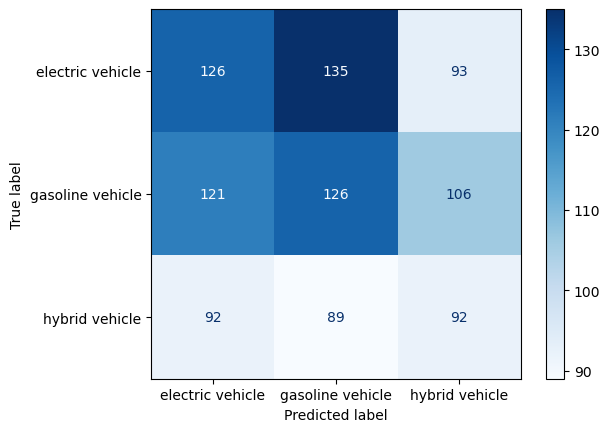

In [107]:
# Print the performance of the random classifier
print("-----RANDOM CLASSIFIER: TRAINING SET-----")
print_metrics(y_train, y_random_train_pred, class_labels)

# Plotting confusion matrices
print("-----CONFUSION MATRIX: TRAINING SET-----")
plot_confusion_matrix(y_train, y_random_train_pred, labels.values())

-----RANDOM CLASSIFIER: TEST SET-----
Accuracy: 0.2653061224489796
Precision: [0.24444444 0.31111111 0.23076923]
Recall: [0.29333333 0.30107527 0.19480519]
F-score: [0.26666667 0.30601093 0.21126761]
-----CONFUSION MATRIX: TEST SET-----


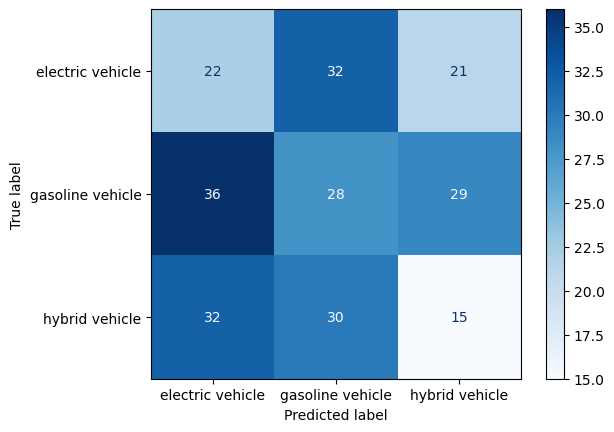

In [108]:
print("-----RANDOM CLASSIFIER: TEST SET-----")
print_metrics(y_test, y_random_test_pred, class_labels)


print("-----CONFUSION MATRIX: TEST SET-----")
plot_confusion_matrix(y_test, y_random_test_pred, labels.values())


# Classification model-1: Decision Tree Classifier

For the first step, we will carry out a simple decision tree to observe how well the labels are predicted

In [109]:
from sklearn.tree import DecisionTreeClassifier

# INITIALIZE MODEL
model = DecisionTreeClassifier()

# TRAIN MODEL 
model.fit(x_train, y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 79.18367346938776
Number of mislabeled points out of a total 980 points = 204

TEST SET (UNTRAINED DATA):
Accuracy: 42.04081632653061
Number of mislabeled points out of a total 245 points = 142

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[0 1 1 2 1 2 2 1 0 0 1 1 2 0 2 0 1 0 0 2]
[0 1 1 0 1 1 2 1 0 0 1 1 0 0 0 0 0 0 0 0]
ERRORS: [ 0  0  0 -2  0 -1  0  0  0  0  0  0 -2  0 -2  0 -1  0  0 -2]

TEST SET (UNTRAINED DATA):
[2 0 2 0 1 2 2 2 0 1 2 1 0 0 2 0 0 1 2 2]
[0 1 0 1 1 0 1 1 0 1 0 1 2 0 0 0 1 1 0 0]
ERRORS: [-2  1 -2  1  0 -2 -1 -1  0  0 -2  0  2  0 -2  0  1  0 -2 -2]


In [110]:
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

### **Final results for Decision Tree**

-----DECISION TREE CLASSIFIER: TRAINING SET-----
Accuracy: 0.7918367346938775
Precision: [0.67946257 0.88685015 1.        ]
Recall: [1.         0.82152975 0.48351648]
F-score: [0.80914286 0.85294118 0.65185185]
-----CONFUSION MATRIX: TRAINING SET-----


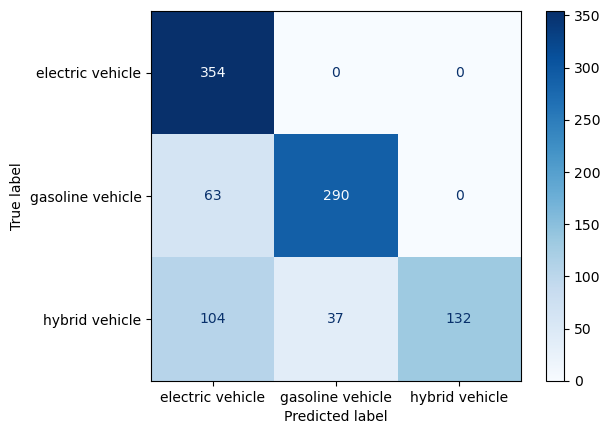

In [111]:
print("-----DECISION TREE CLASSIFIER: TRAINING SET-----")
print_metrics(y_train, yp_train, class_labels)

print("-----CONFUSION MATRIX: TRAINING SET-----")
plot_confusion_matrix(y_train, yp_train, labels.values())

-----DECISION TREE CLASSIFIER: TEST SET-----
Accuracy: 0.4204081632653061
Precision: [0.34782609 0.6        0.225     ]
Recall: [0.53333333 0.58064516 0.11688312]
F-score: [0.42105263 0.59016393 0.15384615]
-----CONFUSION MATRIX: TEST SET-----


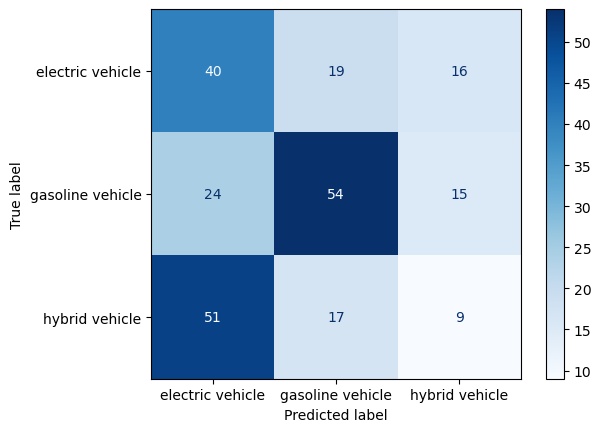

In [112]:
print("-----DECISION TREE CLASSIFIER: TEST SET-----")
print_metrics(y_test, yp_test, class_labels)

print("-----CONFUSION MATRIX: TEST SET-----")
plot_confusion_matrix(y_test, yp_test, labels.values())

### Feature Selection
- In the Naive Bayes tab, I had carried out feature selection process using the variance threshold method and the optimal number of features was determined to be 200.
- I'm carrying out the decision tree classifier based on that outcome to observe any improvements in performance.

### **Final results for Tuned Decision Tree**

In [113]:
# Re-train:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=200)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

-----TUNED DECISION TREE CLASSIFIER: TRAINING SET-----
Accuracy: 0.7918367346938775
Precision: [0.67946257 0.88685015 1.        ]
Recall: [1.         0.82152975 0.48351648]
F-score: [0.80914286 0.85294118 0.65185185]
-----TUNED CONFUSION MATRIX: TRAINING SET-----


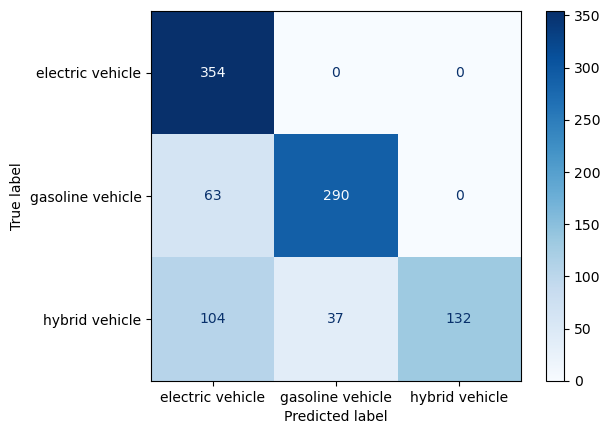

In [114]:
print("-----TUNED DECISION TREE CLASSIFIER: TRAINING SET-----")
print_metrics(y_train, yp_train, class_labels)

print("-----TUNED CONFUSION MATRIX: TRAINING SET-----")
plot_confusion_matrix(y_train, yp_train, labels.values())

-----TUNED DECISION TREE CLASSIFIER: TEST SET-----
Accuracy: 0.4204081632653061
Precision: [0.34234234 0.60227273 0.26086957]
Recall: [0.50666667 0.56989247 0.15584416]
F-score: [0.40860215 0.58563536 0.19512195]
-----TUNED CONFUSION MATRIX: TEST SET-----


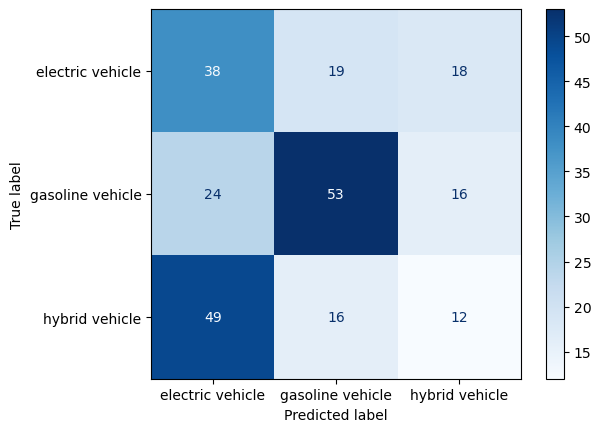

In [115]:
print("-----TUNED DECISION TREE CLASSIFIER: TEST SET-----")
print_metrics(y_test, yp_test, class_labels)

print("-----TUNED CONFUSION MATRIX: TEST SET-----")
plot_confusion_matrix(y_test, yp_test, labels.values())

### Tree Diagram:

In [116]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 100))
tree.plot_tree(model, filled=True, fontsize=12);

## Classification model-2: Random Forest

A more advanced decision tree algorithm (Random Forest) is implemented to observe any performance enhancements from the previous step.

In [117]:
from sklearn.ensemble import RandomForestClassifier

# INITIALIZE MODEL
model = RandomForestClassifier()

# TRAIN MODEL 
model.fit(x_train, y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 79.18367346938776
Number of mislabeled points out of a total 980 points = 204

TEST SET (UNTRAINED DATA):
Accuracy: 46.53061224489796
Number of mislabeled points out of a total 245 points = 131

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[0 1 1 2 1 2 2 1 0 0 1 1 2 0 2 0 1 0 0 2]
[0 1 2 0 1 2 2 1 0 0 1 1 2 0 2 0 0 0 0 1]
ERRORS: [ 0  0  1 -2  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1]

TEST SET (UNTRAINED DATA):
[2 0 2 0 1 2 2 2 0 1 2 1 0 0 2 0 0 1 2 2]
[0 1 0 1 1 0 0 1 0 1 0 1 2 0 1 0 0 1 2 0]
ERRORS: [-2  1 -2  1  0 -2 -2 -1  0  0 -2  0  2  0 -1  0  0  0  0 -2]


In [118]:
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

### **Final results of Random Forest**

-----RANDOM FOREST CLASSIFIER: TRAINING SET-----
Accuracy: 0.7918367346938775
Precision: [0.75245098 0.83426966 0.7962963 ]
Recall: [0.86723164 0.84135977 0.63003663]
F-score: [0.80577428 0.83779972 0.70347648]
-----RANDOM FOREST: TRAINING SET-----


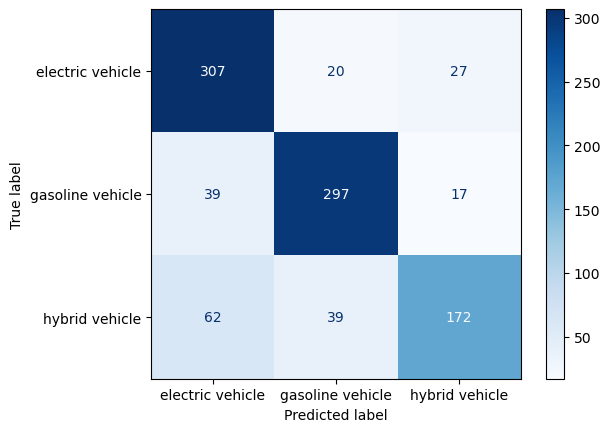

In [119]:
print("-----RANDOM FOREST CLASSIFIER: TRAINING SET-----")
print_metrics(y_train, yp_train, class_labels)

print("-----RANDOM FOREST: TRAINING SET-----")
plot_confusion_matrix(y_train, yp_train, labels.values())

-----RANDOM FOREST CLASSIFIER: TEST SET-----
Accuracy: 0.46530612244897956
Precision: [0.39795918 0.66292135 0.27586207]
Recall: [0.52       0.6344086  0.20779221]
F-score: [0.45086705 0.64835165 0.23703704]
-----CONFUSION MATRIX: TEST SET-----


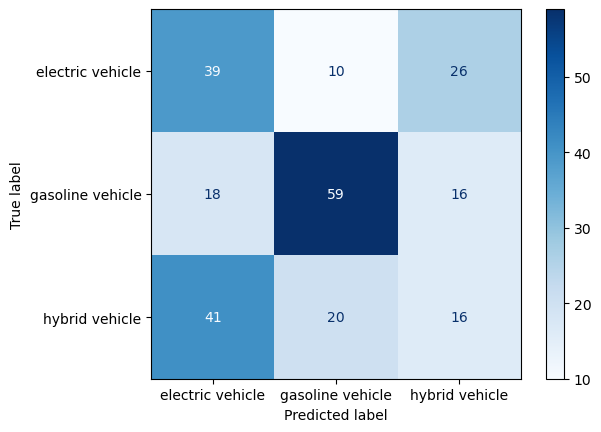

In [120]:
print("-----RANDOM FOREST CLASSIFIER: TEST SET-----")
print_metrics(y_test, yp_test, class_labels)

print("-----CONFUSION MATRIX: TEST SET-----")
plot_confusion_matrix(y_test, yp_test, labels.values())


# Decision Trees for Regression

The sentiment scores, ranging from -1 to 1, are useful for regression analysis with models like a decision tree, to understand sentiment trends related to different vehicle types. This analysis is valuable for automobile manufacturers. It can help in allocating resources for inventory, R&D, and marketing, based on the sentiment data gathered from online sources. This way, manufacturers can align their strategies with the consumers's perception and trends indicated on digital platforms.

## Regression model: Decision Tree Regression
- fit y2 (sentiment score from -1 to 1) instead of y1 (classes)

In [121]:
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y2, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (980, 8233)
y_train.shape		: (980,)
X_test.shape		: (245, 8233)
y_test.shape		: (245,)


### Model tuning
- We can find the optimal max_depth paramter from this step

max_depth = 1: train MAE = 0.37802789659372404, test MAE = 0.37667956658126905
max_depth = 2: train MAE = 0.36483065270701065, test MAE = 0.3778158341734557
max_depth = 3: train MAE = 0.34791160696663853, test MAE = 0.3747152427786673
max_depth = 4: train MAE = 0.33299089908973295, test MAE = 0.35809115136540054
max_depth = 5: train MAE = 0.3165762999024118, test MAE = 0.3507836345744812
max_depth = 6: train MAE = 0.30307608835465766, test MAE = 0.35604688067725576
max_depth = 7: train MAE = 0.2870110952413117, test MAE = 0.35906959232241364
max_depth = 8: train MAE = 0.27164520108073037, test MAE = 0.35243928181934286
max_depth = 9: train MAE = 0.2557884599294701, test MAE = 0.3427716615089755
max_depth = 10: train MAE = 0.24016683732093946, test MAE = 0.3387680314774147
max_depth = 11: train MAE = 0.2280788458865884, test MAE = 0.33039492978113805
max_depth = 12: train MAE = 0.2173305357787406, test MAE = 0.31998115627524676
max_depth = 13: train MAE = 0.2058571547677174, test MAE = 

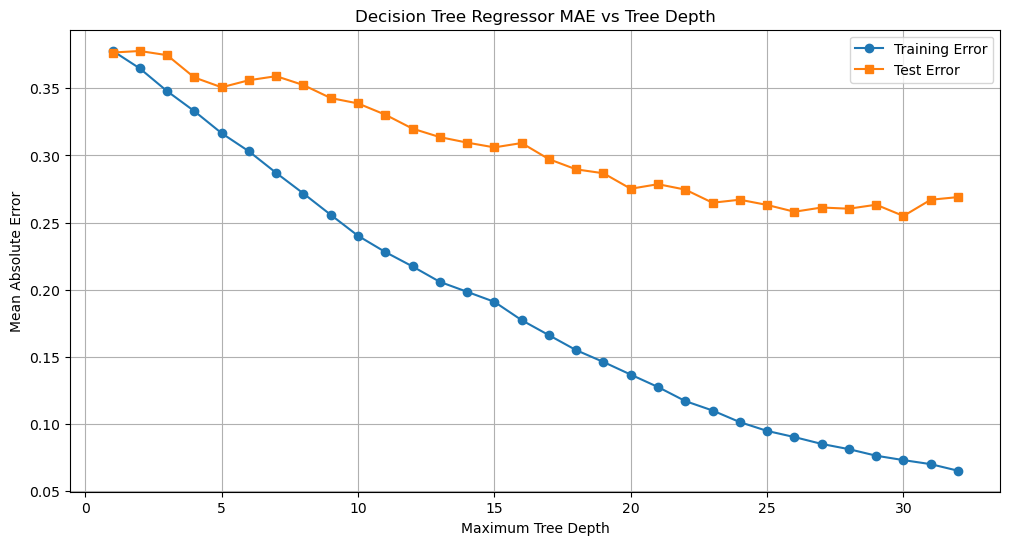

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Prepare lists to store the results of MAE for different depths
max_depths = []
train_error = []
test_error = []

# Loop over max_depth values
for depth in range(1, 33):  
    # Initialize the DecisionTreeRegressor with the current depth
    model = DecisionTreeRegressor(max_depth=depth)

    # Train the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on both the training and test sets
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # Calculate the MAE for both the training and test sets
    err_train = mean_absolute_error(y_train, yp_train)
    err_test = mean_absolute_error(y_test, yp_test)

    # Store the depth and corresponding MAE values in lists
    max_depths.append(depth)
    train_error.append(err_train)
    test_error.append(err_test)

    # Print the results for this depth
    print(f"max_depth = {depth}: train MAE = {err_train}, test MAE = {err_test}")

# Plotting the MAE against tree depth
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_error, label='Training Error', marker='o')
plt.plot(max_depths, test_error, label='Test Error', marker='s')
plt.title('Decision Tree Regressor MAE vs Tree Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

# Re-train with Optimal Parameter

Optimal paramter is chosen to be 25 because beyond this point both training and test datapoints seems to be levelling off and reaching a plateau indicating that a greater depth will not reduce the MAE significantly 

In [123]:
model = DecisionTreeRegressor(max_depth=25)

# Train the model on the training data
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [124]:
# yp_train = model.predict(x_train)
# yp_test = model.predict(x_test)

### **Final results of Regression Decision Tree**

-----TRAINING SET-----


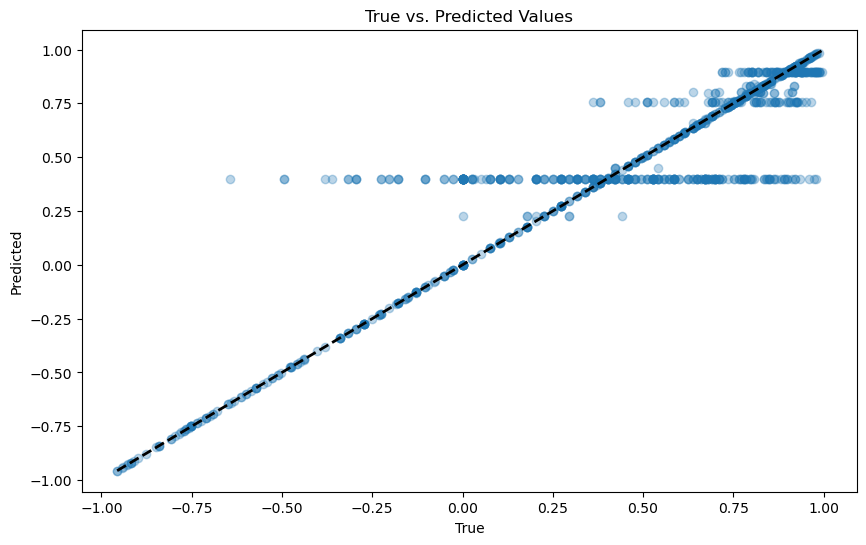

In [128]:
# code ref: https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
# code ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

import matplotlib.pyplot as plt

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--k', linewidth=2)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title('True vs. Predicted Values')
    plt.show()

# Will venture into this later
# # Function to plot residuals
# def plot_residuals(y_true, y_pred):
#     residuals = y_true - y_pred
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_pred, residuals, alpha=0.3)
#     plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed')
#     plt.xlabel('Predicted')
#     plt.ylabel('Residuals')
#     plt.title('Residuals vs. Predicted Values')
#     plt.show()

# Generate predictions
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

# Plotting for training data
print("-----TRAINING SET-----")
plot_actual_vs_predicted(y_train, yp_train)
# plot_residuals(y_train, yp_train)


-----TEST SET-----


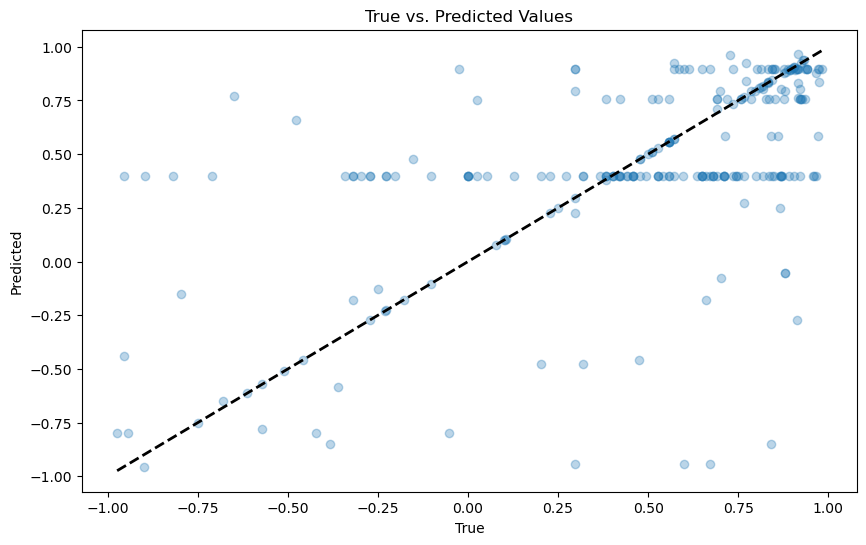

In [129]:
# Plotting for test data
print("-----TEST SET-----")
plot_actual_vs_predicted(y_test, yp_test)
# plot_residuals(y_test, yp_test)

# Conclusions and Highlights

In conclusion, let's take a look at the outputs after each stage of the decision tree process:

1. **Baseline Model**

    - Training set: Accuracy is quite low around 35%. It mislabelled most of the gasoline vehicles as electric vehicles. It also had trouble differenciating between electric and gasoline with similar performance in labelling those two classes.

    - Test set: Accuracy decreased to 26.5%. Over here most electric vehicles are mislabelled as gasoline vehicles. Electric vehicls are most often misclassified as gasoline vehicles, whereas gasoline vehicles are most often misclassified as electric vehicles. Hybrids are most often misclassified as electrics and least often as actual hybrid vehicles. 

    - Final remarks: The performance of the baseline model is quite poor which is expected since it is a random classifier with no sophisticated learning. It is still interesting to see that some labels were predicted correctly. 

2. **Simple Decision Tree**
    - Training set: Accuracy in the training set is significantly higher when compared to the baseline model. Majority of the labels were correctly identified. This supports the assumption that using a decision tree algorithm to classifiy labels is much more efficient. 

    - Test set: The accuracy drops down quite a bit in the test set. This is an indication of overfitting. It performed poorly in recognizing the hybrid labels, by allocating most of it's labels as electric instead. This also supports the initial assumption that the low distribution of the hybrid label to begin with  may cause an issue in model performance. 

    - Final remarks: The model did well in identifying the gasoline vehicles with majority of them correctly labeled. Additionally we can observe a clear improvement from the baseline model which solidifies the theory that decision tree classifiers can leave a great impact on the classification process. However, since we ran into an overfitting issue, this suggests that the modeling may benefit from being trained by a larger amount of more comprehensive data and by implementing hyperparameter tuning tenchniques. This is discussed below.

3. **Tuned Decision Tree (with optimal features)**

    - Training set: Accuracy is in line with the previous results were optimal parameters were not implemented. Overall performance of the model with the training data is similar, majority labels were correctly identified.

    - Test set: Accuracy is still quite low, however, it increased almost by double since the paramter tuning was implemented. This supports the usage of the optimal feature set. 

    - Final remarks: Since performance is still quite low, it it indicative of overfitting. Further approaches need to be implemented in order to get a more satisfactory result. The model seems to mostly struggle with correctly identifying the electric and hybrid labels, but performs quite well when it come to correctly predicticting the gasoline vehicles.

3. **Random Forest**

    - Training set: Accuracy is in line with the decision tree classifiers. Majority labels were correctly predicted with the training dataset.

    - Test set: Accuracy is so far the highest. This is strong evidence in favor of using a more complex classification algorithm such as random forest to classify labelled data. 

    - Final remarks: Even though accuracy is the highest amongst the classification algorithms performed in the scope of this project, the performance is still poor, below 50%. To get better results, a combination of obtaining larger, more diverse data, parameter tuning could be implemented.

4. **Regression**

    - Training set: The performance of the regression decision tree on the sentiment data points is quite well. Most of the points are crowded along the diagonal line. There are some residual data points, however that is expected in a model training result since we don't expect 100% accuracy

    - Test set: There are several data points indicating the trend to be fitted well with the diagonal line, however, the crowding near this line is much lower, indicating a drop in performance. The accuracy on unseen data for this classifying algorithm is low as indicated by the highly spread out points. This is consistent with the overfiting issues that were encountered earlier. 

    - Final remarks: Some interesting results were seen from the various decision tree classification and regression algorthims. Lots of overfitting has been obsewrved! This gives rise to potentially a separate project where this issue can be exmained in greater detail and addressed more closely.

**Nontechnical Conclusion**: Stakeholders may find it beneficial to implement decision tree classification algorithms to analyze their textual content. By doing so, they can make informed business decisions based on the insights derived from the algorithm's results. 

# Resources

- https://scikit-learn.org/stable/modules/tree.html
- https://hbr.org/1964/07/decision-trees-for-decision-making
- https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/pdfs/decision-tree-fundamentals.pdf
- https://www.datacamp.com/tutorial/decision-tree-classification-python
- https://stackoverflow.com/questions/61612198/how-can-i-use-a-probability-distribution-in-python-class
- https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378
- https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263
- https://pynative.com/python-weighted-random-choices-with-probability/
- https://www.geeksforgeeks.org/how-to-get-weighted-random-choice-in-python/#